<center><h2>The Roessler Attractor </h2></center>
<p>
    We solve for the Roessler attractor, a chaotic attractor solution of the system of coupled equations:
 \begin{eqnarray*}
    \dot x & = & -y -z \\
    \dot y & = & x+a y  \\
    \dot z & = & b + z(x-c)\\
    \end{eqnarray*} 

<IPython.core.display.Javascript object>


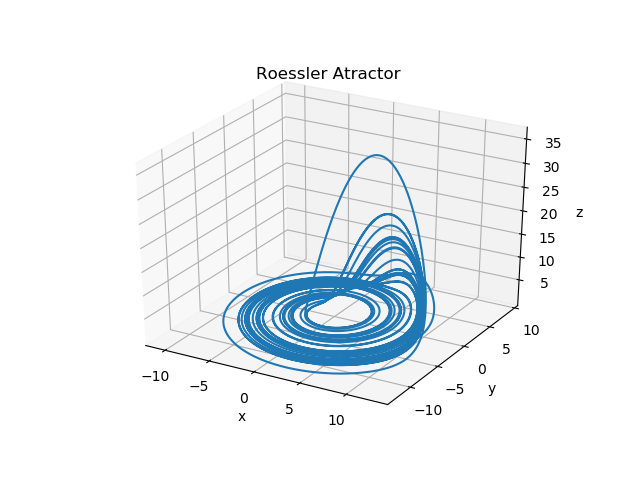

<IPython.core.display.Javascript object>


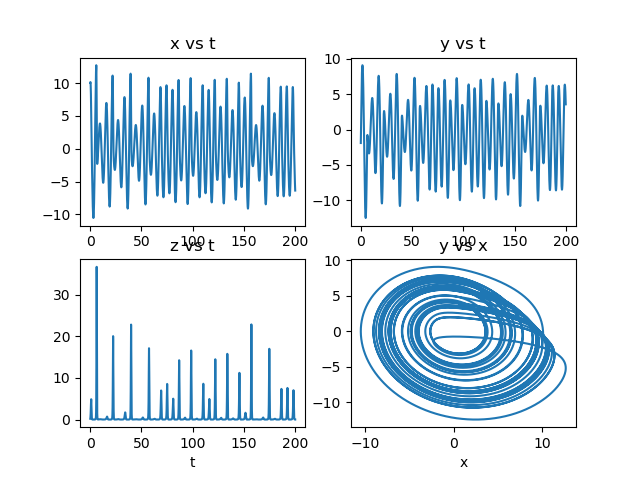

In [2]:
""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased).
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2021. 
    Please respect copyright & acknowledge our work."""

# RoesslerAttractor.ipynb: The Roessler attractor

% matplotlib notebook

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

tt = np.zeros((20000),float)            # time
xx = np.zeros((20000),float)            # position
yy = np.zeros((20000),float)            # velocity
zz = np.zeros((20000),float)            # position
ydo = np.zeros((10000),float)
xdo = np.zeros((10000),float)
xexp = []
xexm = []

def f(t,y):      # right hand side of equation
    a = 0.2       
    b = 0.2        # for roessler funnel use a = 0.343,b = 1.82, c = 9.75
    c = 5.7
    rhs = [0]*(3)  # coupled eqs.
    rhs[0] = -y[1]-y[2]    # xdot =  -y-z
    rhs[1] = y[0] + a*y[1] # ydot = x+ay
    rhs[2] = b + y[0]*y[2]-c*y[2]  # zdot = b+xz-cz
    return rhs

def rk4(t,h,y,n):       # Runge-Kutta 4, parameters: t, step,y,dimension
    k1 = [0.]*(n+1)
    k2 = [0.]*(n+1)
    k3 = [0.]*(n+1)
    k4 = [0.]*(n+1)
    fR = [0.]*(n+1)
    ydumb = [0.]*(n+1)
    fR = f(t, y)                  # function returns rhs
    for i in range(0,n+1): k1[i]  =  h*fR[i]                 
    for i in range(0, n+1): ydumb[i]  =  y[i] + k1[i]/2. 
    fR = f(t + h/2.,ydumb)    
    for i in range(0, n+1):
        k2[i] = h*fR[i]
        ydumb[i]  =  y[i] + k2[i]/2.    
    fR = f(t + h/2., ydumb)
    for i in range(0, n+1):
        k3[i] = h*fR[i]
        ydumb[i]  =  y[i] + k3[i] 
    fR = f(t + h, ydumb)
    for i in range(0, n+1): k4[i] = h*fR[i]
    for i in range(0, n+1): y[i]  =  y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6. #runge kutta
    return y

dt = 0.01            
y = [0]*(3)
y[0] = 10    # initial conditions:x
y[1] = -2   # init cond y
y[2] = 0.2     # init cond z
f(0,y)     # call function for t = 0 with init conds.
dt = 0.01
i = 0
j = 1
for t in np.arange(0,200,dt):
    r = rk4(t,dt,y,2)    # call runge kutta   
    tt[i] = t
    xx[i] = r[0]
    yy[i] = r[1]
    zz[i] = r[2]
    xd = -yy[i]-zz[i]
    if xd >-0.1 and xd<0.1:  # for Poincare map
        xdo[j] = xx[i]
        ydo[j] = yy[i]
        xexp.append(xdo[j])   # to plot xk+1 vs xk
        xexm.append(xdo[j-1])
        j += 1
    i += 1   

def plotxyz():  # plot atractor  
   fig  =  plt.figure()
   ax  =  fig.gca(projection = '3d') # is a parametric curve
   ax.plot(xx,yy,zz)
   ax.set_xlabel('x')
   ax.set_ylabel('y')
   ax.set_zlabel('z')
   ax.set_title('Roessler Atractor')

def plotvst():
    fig, axes  =  plt.subplots(nrows = 2, ncols = 2 )
    axes[0,0].plot(tt,xx)
    axes[0,0].set_title('x vs t')
    axes[0,1].plot(tt,yy)
    axes[0,1].set_title('y vs t')
    axes[1,0].plot(tt,zz)
    axes[1,0].set_title('z vs t')
    axes[1,0].set_xlabel('t')
    axes[1,1].plot(xx,yy)
    axes[1,1].set_title('y vs x')
    axes[1,1].set_xlabel('x')
    
plotxyz() 
plotvst()  
'''
def plotpoincare():
    f2 = plt.figure()
    ax2 = f2.add_subplot(111)       
    plt.plot(xdo,ydo,'ro')
    plt.title("Poincare section")
    plt.ylabel('y')
   
    plt.xlabel("x")
plotpoincare()    
def plotxdot0():            # for dx/dt = 0, z = -y
   fig  =  plt.figure()
   ax2  =  fig.add_subplot(111)# is a parametric curve 
   plt.plot(xexm[1:],xexp[1:],'ro')
   plt.xlabel('$x_k$')
   plt.ylabel('$x_{k+1}$')
   plt.title('$x_{k+1}$     vs  $x_k$') 
plotxdot0() 
'''
plt.show()